In [100]:
import numpy as np

import os

import random
from tqdm import tqdm
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import pandas as pd

from sklearn.utils import shuffle
from PIL import Image
import cv2
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#dummy 
#adaboost
#random
#xgboost
#gradiant 

In [2]:
test_dir = r'C:\Users\ASUS\Desktop\cats vs dogs\test1'

train_dir = r'C:\Users\ASUS\Desktop\cats vs dogs\train'

train = os.listdir(train_dir)

test = os.listdir(test_dir)

In [3]:
label =[]

for i in train:
    name = i.split('.')[0]
    if name == "dog":
        label.append(0)
    else:
        label.append(1)
df = pd.DataFrame({'Image File': train , 'Label': label})

df = shuffle(df)

In [4]:
df.head()

,Image File,Label
11092,cat.8731.jpg,1
2572,cat.12311.jpg,1
16149,dog.2031.jpg,0
1920,cat.11725.jpg,1
6568,cat.466.jpg,1


In [5]:
def plot(img):
    fig, axes = plt.subplots(3, 3,figsize=(15, 5))
    fig.subplots_adjust(hspace=0.4 , wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(mpimg.imread(img[i]))
         
    plt.show()

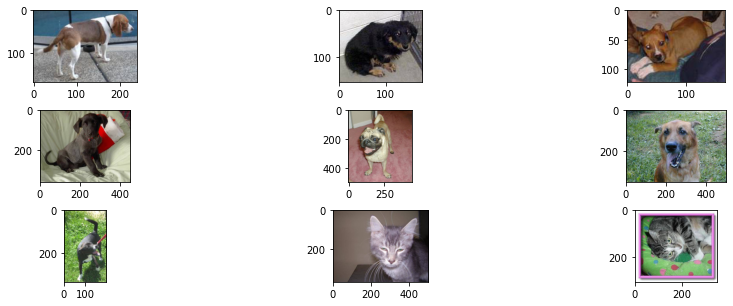

In [6]:
imgs = []

for i in range(10):
  # pick 4 random ids from the dataset
    rand_id = np.random.randint(0, len(train))
  
  # get the img path from the id
    file = df.loc[rand_id, 'Image File'] 
    path = os.path.join(train_dir, file)
    imgs.append(path)
  
plot(imgs)


In [75]:
url=r'C:\Users\ASUS\Desktop\cats vs dogs\train\\'

let's take a look at our data: we have different sized colored images of cats and dogs. 

we would like them to be more uniform, and therefore, we will resize them (despite that it will distort some images) and make them grayscale

https://stackoverflow.com/questions/57931520/image-resizing-problem-with-python-using-cat-and-dog-data

In [76]:
def create_train():
    data = list()
    label = 1
    for img in tqdm(os.listdir(url)):
        if img.startswith('cat'): label = 1 
        else :label = 0 
        im = asarray(Image.open(url+img).resize((50,50)).convert('L'))
        data.append([im,label])
    np.save('training_data.npy', data)
    return data

In [77]:
%%time
training_data=create_train()

100%|██████████| 25000/25000 [00:49<00:00, 501.98it/s]


Wall time: 50.1 s


In [79]:
training_data= np.load('training_data.npy',allow_pickle=True)

In [83]:
training_data.shape

(25000, 2)

In [86]:
X_train =np.array([i[0] for i in training_data])
Y_train =np.array([i[1] for i in training_data])

In [88]:
X_train.shape

(25000, 50, 50)

In [89]:
%%time
X_train=X_train.reshape(25000,2500)

Wall time: 0 ns


In [91]:
X_train.shape

(25000, 2500)

In [93]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

array([[ 58,  48,  48, ...,  28,  34,  47],
       [ 23,  25,  26, ..., 122,  29,  18],
       [ 93, 134, 167, ..., 117, 118, 118],
       ...,
       [ 66,  67,  70, ...,  39,  40,  36],
       [122, 120, 100, ..., 126, 145, 175],
       [ 94,  72,  59, ...,  23,  21,  19]], dtype=uint8)

#starting to do shit

In [101]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train2,y_train2)

RandomForestClassifier(random_state=42)

In [103]:
%%time
y_predict_RF=RF.predict(X_test2)
accuracy=metrics.accuracy_score(y_test2,y_predict_RF)
print("Accuracy",accuracy)

Accuracy 0.642
Wall time: 130 ms
